In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns


from IPython.display import display
pd.set_option('display.max_columns', None)


In [23]:
CSV_metrics_folder = "metric_logs/"
FIG_FOLDER = "./analysis/"

In [2]:
def preprocess_text_wmt14(examples):
    inputs = [ex["en"] for ex in examples["translation"]]
    targets = [ex["fr"] for ex in examples["translation"]]
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df

def preprocess_text_flores200(dataset_src, dataset_tgt):    
    inputs = dataset_flores200_eng['sentence']
    targets = dataset_flores200_fra['sentence']
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df


def num_of_words_in_lang_dataset(df, lang_code):
    df['word_count' + "_" + lang_code] = df[lang_code].apply(lambda x : len(str(x).split(" ")))
    return df


def describe_dataset_df(text_df):
    text_df = num_of_words_in_lang_dataset(text_df, 'en')
    text_df = num_of_words_in_lang_dataset(text_df, 'fr')
    display(text_df.head(10))
    display(text_df.describe())
    text_df.hist(bins = 100)
   
       

In [ ]:
# Analyse WMT14  dataset
all_dataset_wmt14 = load_dataset("wmt14", "fr-en", split="validation")
all_dataset_wmt14

filtered_dataset= all_dataset_wmt14.filter(lambda example: print(len((example["translation"]["en"]).split(" "))))
filtered_dataset

,en,fr,word_count_en,word_count_fr
0,A Republican strategy to counter the re-electi...,Une stratégie républicaine pour contrer la réé...,9,8
1,Republican leaders justified their policy by t...,Les dirigeants républicains justifièrent leur ...,12,15
2,"However, the Brennan Centre considers this a m...","Or, le Centre Brennan considère cette dernière...",26,29
3,"Indeed, Republican lawyers identified only 300...","D'ailleurs, les avocats républicains n'ont rec...",17,17
4,One thing is certain: these new provisions wil...,Une chose est certaine: ces nouvelles disposit...,15,13
5,"In this sense, the measures will partially und...","En ce sens, ces mesures mineront en partie le ...",12,12
6,"Unlike in Canada, the American States are resp...","Contrairement au Canada, les États américains ...",18,15
7,It is in this spirit that a majority of Americ...,C'est dans cet esprit qu'une majorité de gouve...,25,26
8,This phenomenon gained momentum following the ...,Ce phénomène a pris de l'ampleur après les éle...,19,22
9,"As a result, 180 bills restricting the exercis...","En conséquence, 180 projets de lois restreigna...",21,23


,word_count_en,word_count_fr
count,3000.000000,3000.000000
mean,18.696000,20.517000
std,10.998268,12.309842
min,1.000000,1.000000
25%,11.000000,12.000000
50%,17.000000,18.000000
75%,24.000000,27.000000
max,82.000000,100.000000


A Republican strategy to counter the re-election of Obama


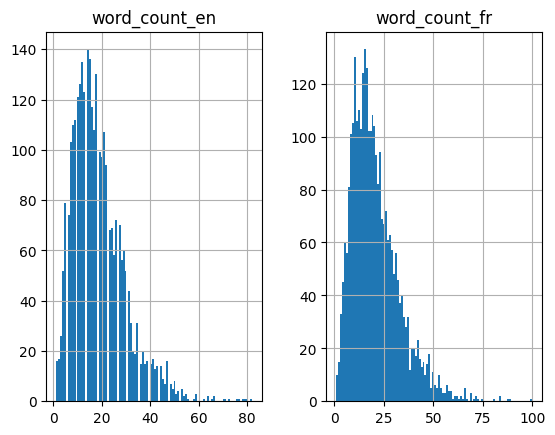

In [4]:
wmt14_df = preprocess_text_wmt14(all_dataset_wmt14)
describe_dataset_df(wmt14_df)
print(all_dataset_wmt14[0]["translation"]["en"])



1. Talk about the best-performing configuration
2. Talk about latency and throughput
3. Talk about the beam size 
4. Spend time generating nice figures
5. Show latency and throughout with and without using archer. Show memory utilisation with and without using archer.
6. Show latency of MoE vs without MoE.
7. 

## 

Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/fra_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)
Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/eng_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)


,en,fr,word_count_en,word_count_fr
0,"On Monday, scientists from the Stanford Univer...",Des scientifiques de l’école de médecine de l’...,43,59
1,Lead researchers say this may bring early dete...,"Selon les chercheurs principaux, cela pourrait...",36,53
2,The JAS 39C Gripen crashed onto a runway at ar...,Le JAS 39C Gripen s’est écrasé sur une piste a...,24,26
3,The pilot was identified as Squadron Leader Di...,Le pilote a été identifié comme étant le chef ...,9,12
4,Local media reports an airport fire vehicle ro...,La presse locale a rapporté qu'un véhicule de ...,11,20
5,28-year-old Vidal had joined Barça three seaso...,"Vidal, 28 ans, avait rejoint le Barça il y a t...",10,16
6,"Since moving to the Catalan-capital, Vidal had...","Depuis son arrivée dans la capitale catalane, ...",13,15
7,The protest started around 11:00 local time (U...,La manifestation a commencé vers 11 h heure lo...,22,29
8,"Just after 11:00, protesters blocked traffic o...","À Whitehall, peu après 11 h 00, des manifestan...",12,19
9,"At 11:20, the police asked the protesters to m...","À 11 h 20, la police a demandé aux manifestant...",29,29


,word_count_en,word_count_fr
count,997.000000,997.000000
mean,21.018054,23.960883
std,6.844051,8.086845
min,6.000000,5.000000
25%,16.000000,18.000000
50%,20.000000,23.000000
75%,25.000000,29.000000
max,48.000000,59.000000


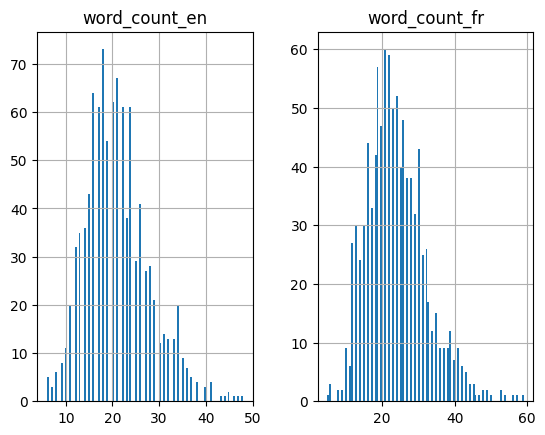

In [5]:
dataset_flores200_fra = load_dataset("facebook/flores", "fra_Latn", split="dev")
dataset_flores200_eng = load_dataset("facebook/flores", "eng_Latn", split="dev")

flores200_df = preprocess_text_flores200(dataset_flores200_eng, dataset_flores200_fra)
describe_dataset_df(flores200_df)
plt.savefig(save_filename,
    dpi=300,
    bbox_inches="tight")

In [30]:
from transformers import AutoTokenizer

def ecdf_plot_two_datasets(dataset_df1, dataset_df2, label_1, label_2, x_axis, title, max_length=256, trunctuation=True, to_pad="do_not_pad", scale=None, save=False, save_filename=None):
    tokenizer = AutoTokenizer.from_pretrained("google/switch-base-128")
    def tokenize(dataset_df):
        
        all_inputs = (list(dataset_df["en"].values) + list(dataset_df["fr"].values))
        all_inputs = [
            tokenizer(input, truncation=trunctuation, padding=to_pad,
                      max_length=max_length).input_ids for input in all_inputs
        ]
        lengths = [len(input) for input in all_inputs]

        return lengths

    lengths_1 = tokenize(dataset_df1)
    lengths_2 = tokenize(dataset_df2)
    plt.figure()
    sns.ecdfplot(lengths_1, label=label_1)
    sns.ecdfplot(lengths_2, label= label_2)

    plt.xlabel(x_axis)
    plt.title(title)
    plt.legend()
    if scale == "log":
        plt.xscale("log")
    if save:
        plt.savefig(save_filename,
            dpi=300,
            bbox_inches="tight")

ECDF Plot of all inputs, french and english. Exploring differences in the length of news text between true & fake news

The ecdf Plot has the same trend for word count of french only, and english only.

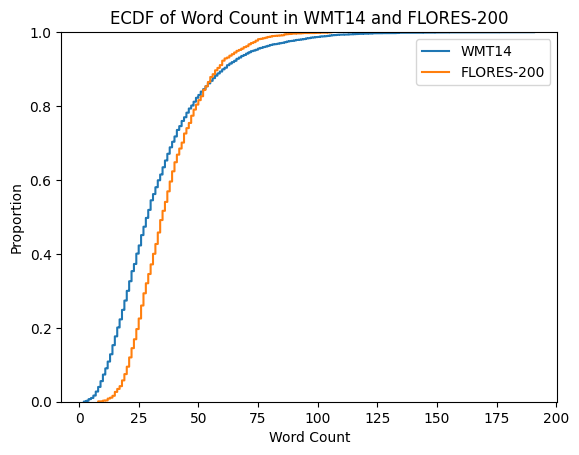

In [31]:
ecdf_plot_two_datasets(wmt14_df, flores200_df, save=True, save_filename=FIG_FOLDER + "ecdf_word_count_wmt14_flores.png", label_1="WMT14", label_2="FLORES-200" , x_axis= "Word Count", title="ECDF of Word Count in WMT14 and FLORES-200")


# print(type(all_inputs[0]))

# # get token ids from all_inputs type tokenizers.Encoding
# all_inputs = all_inputs[-1].ids



In [24]:
!ls ~/Benchmark/metric_logs

nllb-200-distilled-600M_flores200_metrics.csv  t5-base_wmt14_metrics.csv
nllb-200-distilled-600M_wmt14_metrics.csv      t5-large_flores200_metrics.csv
t5-base_flores200_metrics.csv		       t5-large_wmt14_metrics.csv


In [10]:
def ecdf_plot_metric(metric_df, metric_name, title, scale=None, save=False, save_filename=None):
    
    plt.figure()
    sns.ecdfplot(dataset_df[metric_name], label=metric_name)
    

    plt.xlabel(metric_name)
    plt.title(title)
    if scale == "log":
        plt.xscale("log")
    if save:
        plt.savefig(save_filename,
            dpi=300,
            bbox_inches="tight")

In [16]:
# Analyse the experiments!
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(CSV_metrics_folder + "t5-large_wmt14_metrics.csv")
data = data.sort_values(by=['sacrebleu'], ascending=False)
data

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
0,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,-1,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013056,0.013297,1.455264e+03,1.428870e+03
11,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,15,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013458,0.014654,1.411753e+03,1.296568e+03
1,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,-1,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.010052,0.014512,1.890149e+03,1.309284e+03
17,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,30,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013254,0.014525,1.433550e+03,1.308056e+03
16,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,30,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.012573,0.013917,1.511155e+03,1.365234e+03
15,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,30,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013872,0.013503,1.369667e+03,1.407132e+03
14,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,30,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.015490,0.015516,1.226605e+03,1.224573e+03
13,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,30,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.011621,0.015013,1.634998e+03,1.265554e+03
12,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,30,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.014093,0.013428,1.348214e+03,1.414973e+03
10,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,15,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013612,0.014454,1.395829e+03,1.314524e+03


In [35]:
import os
# Merge all metrics to one table
csv_files = os.listdir( CSV_metrics_folder )

files_df_dict = {}
# This would print all the files and directories
for file in csv_files:
    if "metric" in file: 
        data= pd.read_csv(CSV_metrics_folder + file)
        files_df_dict[file] = data

df_merge_all = pd.concat(files_df_dict.values(), ignore_index=True)
df_merge_all

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
0,google/switch-base-128,3318,wmt14,1,1,en,fr,32,64,64,10,do_not_pad,0.000000,0.000000,7.123104,5.342328,0.000000,63.000000,5.617764,0.449250,3.382129e+00,1.402338e+02
1,google/switch-base-128,3318,wmt14,1,1,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.000000,17.069391,12.802043,0.000000,20.000000,5.396237,0.365660,3.520972e+00,5.469559e+01
2,google/switch-base-128,3318,wmt14,3000,3000,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.006250,1.534227,1.973425,0.027693,127.000000,0.022578,0.020744,4.212402e+06,1.836695e+07
3,google/switch-base-128,3318,wmt14,1,1,en,fr,16,1,128,-1,pad_to_max_length,0.000000,0.000000,7.130868,5.348151,0.000000,9.000000,5.123599,0.352520,3.708331e+00,2.553044e+01
4,google/switch-base-128,3318,wmt14,1,1,en,fr,16,2,128,-1,pad_to_max_length,0.000000,0.000000,9.059941,6.794956,0.000000,42.000000,0.085733,0.112664,2.216183e+02,3.727900e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,30,pad_to_max_length,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005269,0.005731,5.974678e+06,6.984593e+06
185,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,4,128,30,pad_to_max_length,40.921532,42.769810,67.942282,65.826641,0.699303,45.297327,0.008987,0.005779,3.502877e+06,7.038210e+06
186,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,1,128,30,do_not_pad,39.979133,42.217735,65.891274,63.764563,0.676340,43.665924,0.005105,0.005507,6.166906e+06,7.120985e+06
187,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,30,do_not_pad,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005203,0.005648,6.050085e+06,7.087948e+06


In [36]:
df_merge_wmt14 = df_merge_all[df_merge_all["dataset_name"] == "wmt14"]
df_merge_flores200 = df_merge_all[df_merge_all["dataset_name"] == "flores200"]

df_merge_wmt14 = df_merge_wmt14.sort_values(by=['sacrebleu'], ascending=False)
df_merge_flores200 = df_merge_flores200.sort_values(by=['sacrebleu'], ascending=False)


In [37]:
display(df_merge_wmt14)
df_merge_wmt14.describe()

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
59,t5-base,222903552,wmt14,1,1,en,fr,32,4,128,30,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.008553,0.007417,2221.479500,2561.636341
52,t5-base,222903552,wmt14,1,1,en,fr,32,2,128,15,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.008513,0.006944,2231.936000,2736.354176
25,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,30,do_not_pad,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.012573,0.013917,1511.154700,1365.233502
26,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,30,do_not_pad,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.013254,0.014525,1433.550400,1308.056376
45,t5-base,222903552,wmt14,1,1,en,fr,32,1,128,-1,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.007871,0.007028,2413.817400,2703.572278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,google/switch-base-128,3318,wmt14,1,1,en,fr,16,16,128,-1,pad_to_max_length,0.0,0.0,17.069391,12.802043,0.000000,20.0,0.085883,0.120029,221.230470,166.626198
3,google/switch-base-128,3318,wmt14,1,1,en,fr,16,1,128,-1,pad_to_max_length,0.0,0.0,7.130868,5.348151,0.000000,9.0,5.123599,0.352520,3.708331,25.530444
4,google/switch-base-128,3318,wmt14,1,1,en,fr,16,2,128,-1,pad_to_max_length,0.0,0.0,9.059941,6.794956,0.000000,42.0,0.085733,0.112664,221.618350,372.790028
5,google/switch-base-128,3318,wmt14,1,1,en,fr,16,8,128,-1,pad_to_max_length,0.0,0.0,17.069391,12.802043,0.000000,20.0,0.087138,0.126561,218.045700,158.027091


,total_params,dataset_size,dataset_size_after_filter_wrt_input_len,batch_size,beam_size,max_gen_length,max_input_seq_length,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
count,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,1.150000e+02,1.150000e+02
mean,4.932457e+08,1435.304348,1121.791304,30.539130,3.052174,127.443478,13.808696,53.522795,56.906752,72.757947,71.400581,0.726605,28.983292,0.157690,0.022464,4.267149e+06,4.868609e+06
std,2.481353e+08,1504.638222,1271.436448,5.145748,6.024575,5.968031,12.812340,33.474736,32.196417,25.183463,26.154243,0.271071,12.915988,0.860329,0.063349,5.535921e+06,6.803747e+06
min,3.318000e+03,1.000000,1.000000,8.000000,1.000000,64.000000,-1.000000,0.000000,0.000000,1.534227,1.973425,0.000000,9.000000,0.005112,0.005119,3.382129e+00,2.553044e+01
25%,2.229036e+08,1.000000,1.000000,32.000000,1.000000,128.000000,-1.000000,31.184371,35.894051,57.035956,54.739009,0.570411,19.000000,0.006285,0.005854,1.945149e+03,2.582718e+03
50%,6.150738e+08,1.000000,1.000000,32.000000,2.000000,128.000000,15.000000,32.684899,37.723829,58.532783,56.207516,0.581507,29.112409,0.008988,0.007615,2.756521e+03,5.543738e+03
75%,7.376681e+08,3000.000000,2627.000000,32.000000,4.000000,128.000000,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,33.930910,0.011779,0.014564,7.235388e+06,7.055494e+06
max,7.376681e+08,3000.000000,3000.000000,32.000000,64.000000,128.000000,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,127.000000,5.617764,0.449250,1.991080e+07,2.270687e+07


In [38]:
df_merge_flores200

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
155,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006225,0.007850,7.511659e+05,7.299693e+05
158,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006009,0.007937,7.781424e+05,7.219797e+05
134,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.011072,0.019855,4.223391e+05,2.891444e+05
131,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.012197,0.019412,3.833789e+05,2.957427e+05
133,t5-large,737668096,flores200,997,199,en,fr,32,2,128,15,do_not_pad,46.734531,51.371105,68.469337,66.729572,0.684879,28.688442,0.011110,0.014793,4.208717e+05,3.859292e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,t5-base,222903552,flores200,1,1,en,fr,32,1,128,-1,do_not_pad,14.534554,20.439332,55.127485,50.386315,0.443005,84.000000,0.009321,0.006793,6.437327e+03,1.236617e+04
145,t5-base,222903552,flores200,1,1,en,fr,32,2,128,-1,do_not_pad,14.534554,20.439332,55.127485,50.386315,0.443005,84.000000,0.008587,0.006964,6.986932e+03,1.206157e+04
121,t5-large,737668096,flores200,1,1,en,fr,32,2,128,-1,do_not_pad,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.012221,0.013922,4.909724e+03,6.249099e+03
7,google/switch-base-128,3318,flores200,1,1,en,fr,16,4,128,-1,pad_to_max_length,0.308423,0.004684,6.215161,5.128035,0.008013,32.000000,0.565511,0.044156,1.060988e+02,7.246957e+02


In [39]:
df_merge_flores200_multiple_sentences = df_merge_flores200[df_merge_flores200["dataset_size"] != 1]
display(df_merge_flores200_multiple_sentences)

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
155,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006225,0.007850,751165.94,7.299693e+05
158,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006009,0.007937,778142.40,7.219797e+05
134,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.011072,0.019855,422339.10,2.891444e+05
131,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.012197,0.019412,383378.90,2.957427e+05
133,t5-large,737668096,flores200,997,199,en,fr,32,2,128,15,do_not_pad,46.734531,51.371105,68.469337,66.729572,0.684879,28.688442,0.011110,0.014793,420871.72,3.859292e+05
130,t5-large,737668096,flores200,997,199,en,fr,32,2,128,15,pad_to_max_length,46.734531,51.371105,68.469337,66.729572,0.684879,28.688442,0.010895,0.015007,429184.16,3.804351e+05
154,t5-base,222903552,flores200,997,199,en,fr,32,2,128,15,pad_to_max_length,46.700698,51.403767,68.118317,66.419358,0.681391,28.673367,0.006133,0.007602,762475.56,7.506031e+05
157,t5-base,222903552,flores200,997,199,en,fr,32,2,128,15,do_not_pad,46.700698,51.403767,68.118317,66.419358,0.681391,28.673367,0.006194,0.007623,754967.94,7.484951e+05
132,t5-large,737668096,flores200,997,199,en,fr,32,1,128,15,do_not_pad,46.639147,50.786095,68.327292,66.700947,0.687270,28.216080,0.010783,0.014988,433641.97,3.746347e+05
129,t5-large,737668096,flores200,997,199,en,fr,32,1,128,15,pad_to_max_length,46.639147,50.786095,68.327292,66.700947,0.687270,28.216080,0.010720,0.014812,436177.00,3.790729e+05


Some first insight: 
We initially padded our tokenizers if sentence length is short.
Then, from our first experimentation, notice that there is a trend in the column max_length and beam size. 
We wondered whether this has to do with padding so we decided to test out with it by adding a new hyperparameter: "no_pad_fill"





In [40]:
df_merge_wmt14_multiple_sentences = df_merge_wmt14[df_merge_wmt14["dataset_size"] != 1]
df_merge_wmt14_multiple_sentences 

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
29,t5-large,737668096,wmt14,3000,3000,en,fr,32,4,128,-1,pad_to_max_length,32.789237,37.810019,58.650936,56.311633,0.580000,39.982000,0.012072,0.023508,7878415.5,5.102418e+06
32,t5-large,737668096,wmt14,3000,3000,en,fr,32,4,128,-1,do_not_pad,32.789237,37.810019,58.650936,56.311633,0.580000,39.982000,0.011936,0.023301,7967884.0,5.147706e+06
41,t5-large,737668096,wmt14,3000,2627,en,fr,32,4,128,30,pad_to_max_length,32.684899,37.723829,58.276515,55.978628,0.578750,33.875143,0.011361,0.021791,6375170.0,4.083831e+06
44,t5-large,737668096,wmt14,3000,2627,en,fr,32,4,128,30,do_not_pad,32.684899,37.723829,58.276515,55.978628,0.578750,33.875143,0.011153,0.021735,6493999.5,4.094283e+06
28,t5-large,737668096,wmt14,3000,3000,en,fr,32,2,128,-1,pad_to_max_length,32.630036,37.582780,58.532783,56.207516,0.578852,39.766333,0.011178,0.016412,8508483.0,7.269011e+06
31,t5-large,737668096,wmt14,3000,3000,en,fr,32,2,128,-1,do_not_pad,32.630036,37.582780,58.532783,56.207516,0.578852,39.766333,0.010917,0.015976,8712280.0,7.467531e+06
37,t5-large,737668096,wmt14,3000,1370,en,fr,32,4,128,15,pad_to_max_length,32.551606,37.533705,57.000026,54.811899,0.570629,22.478832,0.018737,0.016295,1460988.4,1.889937e+06
38,t5-large,737668096,wmt14,3000,1370,en,fr,32,4,128,15,do_not_pad,32.551606,37.533705,57.000026,54.811899,0.570629,22.478832,0.011362,0.016096,2409316.5,1.913223e+06
43,t5-large,737668096,wmt14,3000,2627,en,fr,32,2,128,30,do_not_pad,32.413550,37.403628,58.093103,55.810080,0.577347,33.669204,0.011321,0.014941,6397322.0,5.919759e+06
40,t5-large,737668096,wmt14,3000,2627,en,fr,32,2,128,30,pad_to_max_length,32.413550,37.403628,58.093103,55.810080,0.577347,33.669204,0.011127,0.014867,6509140.5,5.949543e+06


Also, for latency and throughput, we first recorded it outside model.generate(). but, in order to truly analyse the inference speed, it is better to break down into the encoder and decoder speed. 
The other reason is that we want to normalise this metric, since working with variable inputs means that some batches may finish faster than others - it is not correct to compare inference speed of sentence length 10 vs another sample with sentence length 50. hence, we need to normalise it. 
To do that, we divide the latency for encoder by the number of tokens. 




In [41]:
df_merge_wmt14_single_sentence = df_merge_wmt14[df_merge_wmt14["dataset_size"] == 1].drop(["sacrebleu", "spBleu", "chrf" ,'chrfpp', 'meteor'], axis=1)
df_merge_wmt14_single_sentence = df_merge_wmt14_single_sentence.sort_values(by=['encoder_latency_s'], ascending=False)
df_merge_wmt14_single_sentence

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
0,google/switch-base-128,3318,wmt14,1,1,en,fr,32,64,64,10,do_not_pad,63.0,5.617764,0.449250,3.382129,140.233800
1,google/switch-base-128,3318,wmt14,1,1,en,fr,16,4,128,-1,pad_to_max_length,20.0,5.396237,0.365660,3.520972,54.695587
3,google/switch-base-128,3318,wmt14,1,1,en,fr,16,1,128,-1,pad_to_max_length,9.0,5.123599,0.352520,3.708331,25.530444
89,facebook/nllb-200-distilled-600M,615073792,wmt14,1,1,en,fr,32,1,128,15,pad_to_max_length,30.0,0.372415,0.005318,56.388670,5641.676950
83,facebook/nllb-200-distilled-600M,615073792,wmt14,1,1,en,fr,32,1,128,-1,pad_to_max_length,30.0,0.370483,0.005535,56.682724,5419.642508
5,google/switch-base-128,3318,wmt14,1,1,en,fr,16,8,128,-1,pad_to_max_length,20.0,0.087138,0.126561,218.045700,158.027091
6,google/switch-base-128,3318,wmt14,1,1,en,fr,16,16,128,-1,pad_to_max_length,20.0,0.085883,0.120029,221.230470,166.626198
4,google/switch-base-128,3318,wmt14,1,1,en,fr,16,2,128,-1,pad_to_max_length,42.0,0.085733,0.112664,221.618350,372.790028
23,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,30,pad_to_max_length,19.0,0.015490,0.015516,1226.604600,1224.573303
12,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,-1,do_not_pad,19.0,0.014617,0.013199,1299.871000,1439.478482


I kept the max_gen_length constant, since I wasn't sure if it was a useful metric for machine translation (at least for my purposes here, since the maximum number of tokens a sentence can have is around 80 or something like that), but i could be wrong. Yesterday I showed you that max_gen_length did slightly better than 256. My speculation that maybe one of the results' generation got truncuated from the decoder, but that does not mean the translation is better

Oh so, we wanted to investigate the low gen_length, so we wanted to check the padding if it destroys accuracy. in theory, it shouldnt. we see from our experiments that it doesnt. 




In [48]:


# # Create subplots for different metrics
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# # Plot 1: sacrebleu vs beam_size
# data.plot(x='beam_size', y='sacrebleu', kind='bar', ax=axes[0, 0], title='sacrebleu vs beam_size')
# axes[0, 0].set_xlabel('Beam Size')
# axes[0, 0].set_ylabel('sacrebleu')

# # Plot 2: spBleu vs beam_size
# data.plot(x='beam_size', y='spBleu', kind='line', ax=axes[0, 1], title='spBleu vs beam_size')
# axes[0, 1].set_xlabel('Beam Size')
# axes[0, 1].set_ylabel('spBleu')

# # Plot 3: chrf vs beam_size
# data.plot(x='beam_size', y='chrf', kind='line', ax=axes[1, 0], title='chrf vs beam_size')
# axes[1, 0].set_xlabel('Beam Size')
# axes[1, 0].set_ylabel('chrf')

# # Plot 4: chrfpp vs beam_size
# data.plot(x='beam_size', y='chrfpp', kind='line', ax=axes[1, 1], title='chrfpp vs beam_size')
# axes[1, 1].set_xlabel('Beam Size')
# axes[1, 1].set_ylabel('chrfpp')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# Calculate mean and standard deviation of each metric
metrics = ['sacrebleu', 'spBleu', 'chrf', 'chrfpp', 'meteor']
for metric in metrics:
    mean = data[metric].mean()
    std = data[metric].std()
    print(f"Metric: {metric}\nMean: {mean:.2f}\nStandard Deviation: {std:.2f}\n")

Metric: sacrebleu
Mean: 34.64
Standard Deviation: 9.18

Metric: spBleu
Mean: 37.82
Standard Deviation: 6.94

Metric: chrf
Mean: 65.30
Standard Deviation: 3.49

Metric: chrfpp
Mean: 62.60
Standard Deviation: 4.52

Metric: meteor
Mean: 0.64
Standard Deviation: 0.09



In [49]:
# Find the row with the highest value for each metric
best_hyperparameters = {}
for metric in metrics:
    best_row = data[data[metric] == data[metric].max()]  # Assumes higher value is better
    best_hyperparameters[metric] = best_row.iloc[0]

# Display the best hyperparameters for each metric
for metric, best_row in best_hyperparameters.items():
    print(f"Best hyperparameters for {metric}:")
    print(best_row)
    print("\n")

Best hyperparameters for sacrebleu:
model_name                                 facebook/nllb-200-distilled-600M
total_params                                                      615073792
dataset_name                                                      flores200
dataset_size                                                            997
dataset_size_after_filter_wrt_input_len                                 997
src_lang                                                                 en
tgt_lang                                                                 fr
batch_size                                                               32
beam_size                                                                 4
max_gen_length                                                          128
max_input_seq_length                                                     -1
tokenizer_padding_setting                                 pad_to_max_length
sacrebleu                                           

[0.01666667 0.03333333 0.05       0.06666667 0.08333333 0.1
 0.11666667 0.13333333 0.15       0.16666667 0.18333333 0.2
 0.21666667 0.23333333 0.25       0.26666667 0.28333333 0.3
 0.31666667 0.33333333 0.35       0.36666667 0.38333333 0.4
 0.41666667 0.43333333 0.45       0.46666667 0.48333333 0.5
 0.51666667 0.53333333 0.55       0.56666667 0.58333333 0.6
 0.61666667 0.63333333 0.65       0.66666667 0.68333333 0.7
 0.71666667 0.73333333 0.75       0.76666667 0.78333333 0.8
 0.81666667 0.83333333 0.85       0.86666667 0.88333333 0.9
 0.91666667 0.93333333 0.95       0.96666667 0.98333333 1.        ]


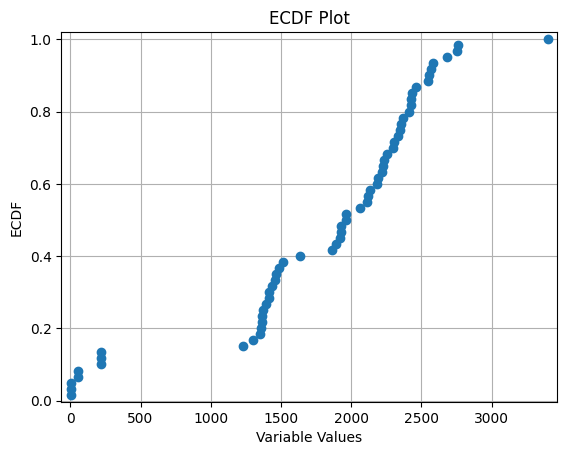

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data

# Calculate the ECDF
x = np.sort(df_merge_wmt14_single_sentence["encoder_throughput"])
y = np.arange(1, len(x) + 1) / len(x)
print(y)
# Create the ECDF plot
plt.plot(x, y, marker='o', linestyle='none')
plt.xlabel('Variable Values')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.margins(0.02)  # Add a small margin around the plot
plt.grid(True)
plt.show()

hello
